In [1]:
import numpy as np

In [48]:
type = "Set"
path = "/home/andrea/Desktop/Final/Baseline3Second/3.1/"+type+"/"

In [49]:
files = []
lines = []
workers = 8
allArrivals = [[[] for i in range(13)] for j in range(4)]
for rep in range(1, 4):
    print(rep)
    clients = 0
    for cli in [1, 4, 8, 12, 16, 20, 24, 28, 32, 45, 60, 85, 110]: #
        print(cli)
        work = 0
        for workers in [8, 16, 32, 64]:
            file = open(path+"rep"+str(rep)+"/MW/"+type+"_C"+str(cli)+"_T2_W"+str(workers)+"_R"+str(rep)+"/interArrivalTime.log")
            ind = 0
            for line in file:
                if ind != 0:
                    allArrivals[work][clients].append(float(line[:-1]))
                ind += 1
            work += 1
        clients += 1

1
1
4
8
12
16
20
24
28
32
45
60
85
110
2
1
4
8
12
16
20
24
28
32
45
60
85
110
3
1
4
8
12
16
20
24
28
32
45
60
85
110


In [50]:
meanInterArrivals = np.zeros((4, 13))
for i in range(0, 4):
    for j in range(0, 13):
        meanInterArrivals[i][j] = np.mean(allArrivals[i][j])

In [51]:
fileOutput = open("/home/andrea/Desktop/Final/Baseline3Second/3.1/"+type+"/InterarrivalsTimes.txt", "w")

In [52]:
clients = [1, 4, 8, 12, 16, 20, 24, 28, 32, 45, 60, 85, 110]
for j in range(0, len(clients)):
    clients[j] = clients[j] *2

fileOutput.write("Mean Interarrival Time")
for j in range(len(meanResp)):
    fileOutput.write("\n\nWorker: " + str(2**(3+j)) + "\n")
    for h in range(0, len(meanResp[0])):         
        fileOutput.write("\n"+str(clients[h])+" Clients: ")
        fileOutput.write(str(meanInterArrivals[j][h]/1000000))
fileOutput.close()

In [169]:
files = []
lines = []
workers = 64
allThroughput = [[] for i in range(13)]
for rep in range(1, 4):
    client = 0
    for cli in [1, 4, 8, 12, 16, 20, 24, 28, 32, 45, 60, 85, 110]: #1, 4, 8, 12, 16, 20, 24, 28, 32, 45, 
        file = open(path+"rep"+str(rep)+"/MW/"+type+"_C"+str(cli)+"_T2_W"+str(workers)+"_R"+str(rep)+"/Throughput.log")
        ind = 0
        for line in file:
            if ind != 0:
                allThroughput[client].append(float(line[:-1]))
            ind += 1
        client += 1

In [282]:
#utilizzazione
(1000000000/np.mean(allArrivals))/(workers *1000000000/3552241) #ultimo è min service time

0.72098765297307477

In [209]:
files = []
workers = 32
allThroughput = [[] for i in range(2)]
for rep in range(1, 4):
    client = 0
    for cli in [1, 4, 8, 12, 16, 20, 24, 28, 32, 45, , 60, 85, 110]: 
        file = open(path+"rep"+str(rep)+"/memtier/"+type+"_C"+str(cli)+"_T2_W"+str(workers)+"_R"+str(rep)+".log")
        lines = []
        for line in file:
            lines.append(line)

        x = np.asarray(lines)

        i = 2
        countI = 0
        while x[i] != "ALL STATS\n":
            countI += 1
            i += 1

        i += 7  #4 per set, 5 per get, 7 per 50%50
        z = x[i][6:]
        m = 0
        singleThroughput = ""
        while z[m] == " ":
            m += 1
        while z[m] != " ":
            singleThroughput += z[m]
            m += 1 
        allThroughput[client].append(float(singleThroughput))
        client += 1

In [177]:
count = 0
for j in range(0, len(allThroughput)):
    for i in range(0, len(allThroughput[j])):
        if allThroughput[j][i] > 10000:
            count += 1
        
print(count)
totLength = len(allThroughput[-1])
print(count/totLength)

13
0.35135135135135137


In [53]:
files = []
lines = []
allWorkerTimes = [[[] for i in range(13)] for j in range(4)]
allProcessingTimes = [[[] for i in range(13)] for j in range(4)]
allServiceTimes = [[[] for i in range(13)] for j in range(4)]
allWaitingTimes = [[[] for i in range(13)] for j in range(4)]
allResponseTimes = [[[] for i in range(13)] for j in range(4)]
allTotalTimes = [[[] for i in range(13)] for j in range(4)]
for rep in range(1, 4):
    print(rep)
    clients = 0
    for cli in [1, 4, 8, 12, 16, 20, 24, 28, 32, 45, 60, 85, 110]: 
        print(cli)
        work = 0
        for workers in [8, 16, 32, 64]:
            file = open(path+"rep"+str(rep)+"/MW/"+type+"_C"+str(cli)+"_T2_W"+str(workers)+"_R"+str(rep)+"/times.log")
            ind = 0
            for line in file:
                if ind != 0 and len(line.split("\t")) > 6:
                    splitted = line.split("\t")
                    allWaitingTimes[work][clients].append(int(splitted[2]))
                    allWorkerTimes[work][clients].append(int(splitted[3]))
                    allProcessingTimes[work][clients].append(int(splitted[4]))
                    allServiceTimes[work][clients].append(int(splitted[5]))
                    allResponseTimes[work][clients].append(int(splitted[6]))
                    allTotalTimes[work][clients].append(int(splitted[-1]))
                ind += 1
            work += 1
        clients += 1


1
1
4
8
12
16
20
24
28
32
45
60
85
110
2
1
4
8
12
16
20
24
28
32
45
60
85
110
3
1
4
8
12
16
20
24
28
32
45
60
85
110


In [54]:
meanResp = np.zeros((4, 13))
meanWait = np.zeros((4,13))
meanProc =np.zeros((4, 13))
meanWorker = np.zeros((4, 13))
meanServ = np.zeros((4, 13))
meanTot = np.zeros((4, 13))
for i in range(0, 4):
    for j in range(0, 13):
        meanProc[i][j] = np.mean(allProcessingTimes[i][j])
        meanWait[i][j] = np.mean(allWaitingTimes[i][j])
        meanResp[i][j] = np.mean(allResponseTimes[i][j])
        meanServ[i][j] = np.mean(allServiceTimes[i][j])
        meanTot[i][j] = np.mean(allTotalTimes[i][j])
        meanWorker[i][j] = np.mean(allWorkerTimes[i][j])

In [63]:
fileOutput = open("/home/andrea/Desktop/Final/Baseline3Second/3.1/"+type+"/ServiceTimes.txt", "w")

In [64]:
clients = [1, 4, 8, 12, 16, 20, 24, 28, 32, 45, 60, 85, 110]
for j in range(0, len(clients)):
    clients[j] = clients[j] *2

fileOutput.write("Mean Service Time")
for j in range(len(meanResp)):
    fileOutput.write("\n\nWorker: " + str(2**(3+j)) + "\n")
    for h in range(0, len(meanResp[0])):         
        fileOutput.write("\n"+str(clients[h])+" Clients: ")
        fileOutput.write(str(meanServ[j][h]/1000000))
fileOutput.close()

In [230]:
import matplotlib.pyplot as plt

In [237]:
plt.figure(figsize=(20, 15))
width = 1
pos = [5, 10, 15, 20]
pos = np.asarray(pos)
workers = np.asarray([8, 16, 32, 64])
arrayInter = np.zeros((4, 4))
client = -1
for i in range(0, 4):
    arrayInter[0][i] = meanTot[i][client]/1000000
    arrayInter[1][i] = meanServS[i][client]/1000000
    arrayInter[2][i] = meanWait[i][client]/1000000
    arrayInter[3][i] = meanRespS[i][client]/1000000
    
plt.title('Undersaturated (4 clients) - Component Utilization', fontsize= 20)
plt.xlabel("Worker Threads", fontsize= 20)
plt.yticks(fontsize=14)
plt.ylabel("Time [msec]", fontsize= 20)
rect = plt.bar(pos, arrayInter[0], width, color='lightblue',label="Total time in System")
rect2 = plt.bar(pos+width, arrayInter[2], width,  color='lightsalmon',label="Waiting Time")
rect3 = plt.bar(pos+2*width, arrayInter[1], width, color='C2',label="Service Time")
#rect4 = plt.bar(pos+3*width, arrayInter[3], width,  color='lightsalmon',label="Response Time")

#rect5 = plt.bar(workers+5*width, meanTot[0][-1], width, tick_label=workers, color='lightblue',label="Total")
#rect6 = plt.bar(workers+6*width, meanServS[0][-1], width, tick_label=workers, color='green',label="Serv")
#rect7 = plt.bar(workers+7*width, meanWait[0][-1], width, tick_label=workers, color='salmon',label="Wait")
#rect8 = plt.bar(workers+8*width, meanRespS[0][-1], width, tick_label="Resp", color='C1',label="Resp")

plt.legend(loc=1, fontsize='xx-large')
plt.xticks(pos +width, workers,  fontsize = 14)


def autolabel(rects):
    """
    Attach a text label above each bar displaying its height
    """
    for rect in rects:
        height = rect.get_height()
        plt.text(rect.get_x() + rect.get_width()/2., height,
                '%.3f' % float(height), ha='center', va='bottom', fontsize=14)

autolabel(rect)
autolabel(rect2)
autolabel(rect3)
#autolabel(rect4)

In [238]:
plt.savefig("/home/andrea/Desktop/Final/Baseline3Second/3.1/"+type+"/componentUtilizationSatur.png")

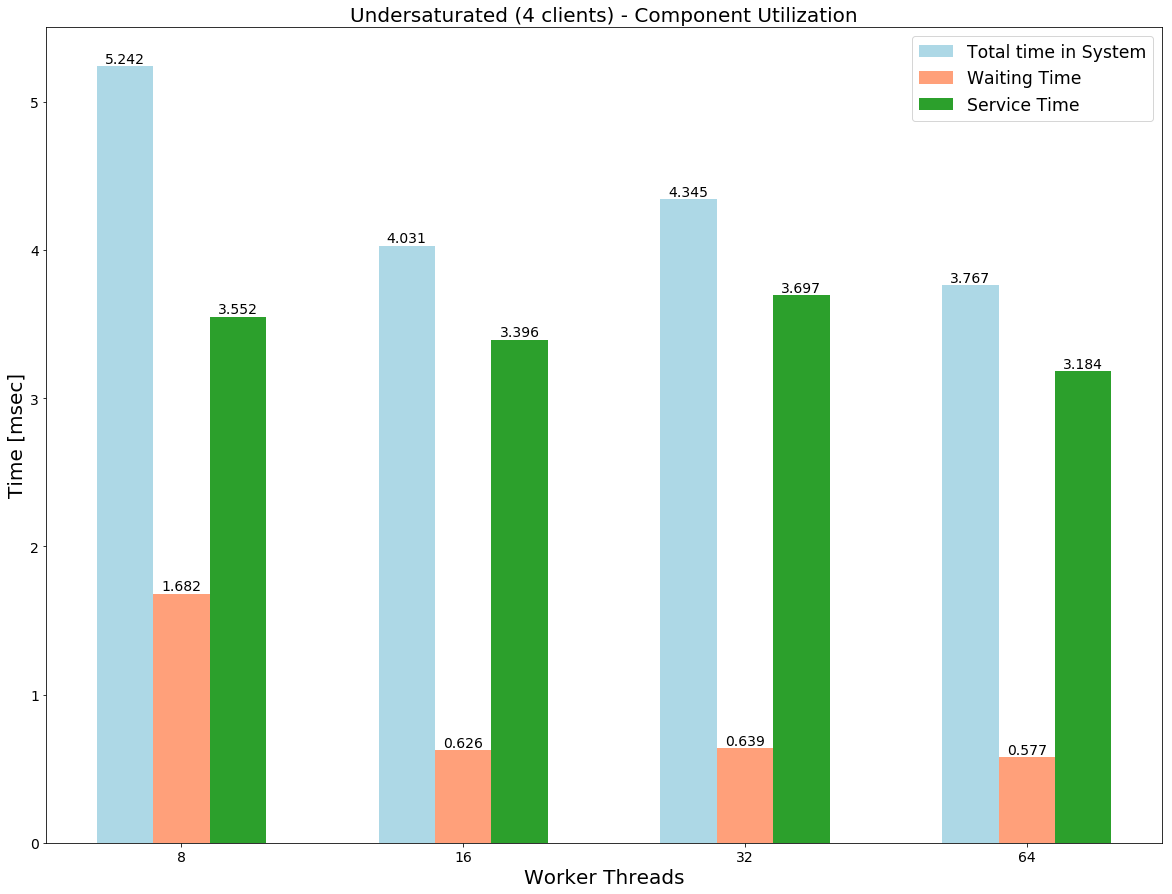

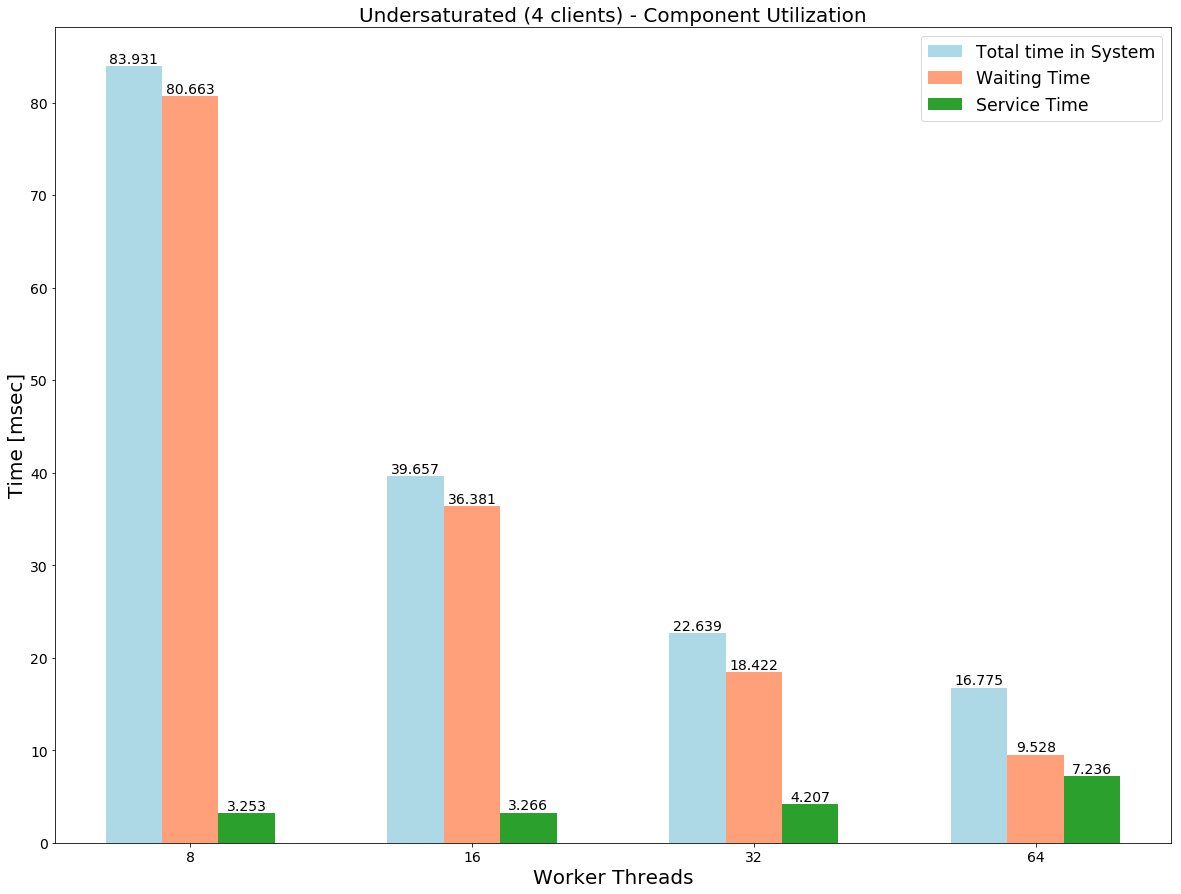

In [236]:
plt.show()

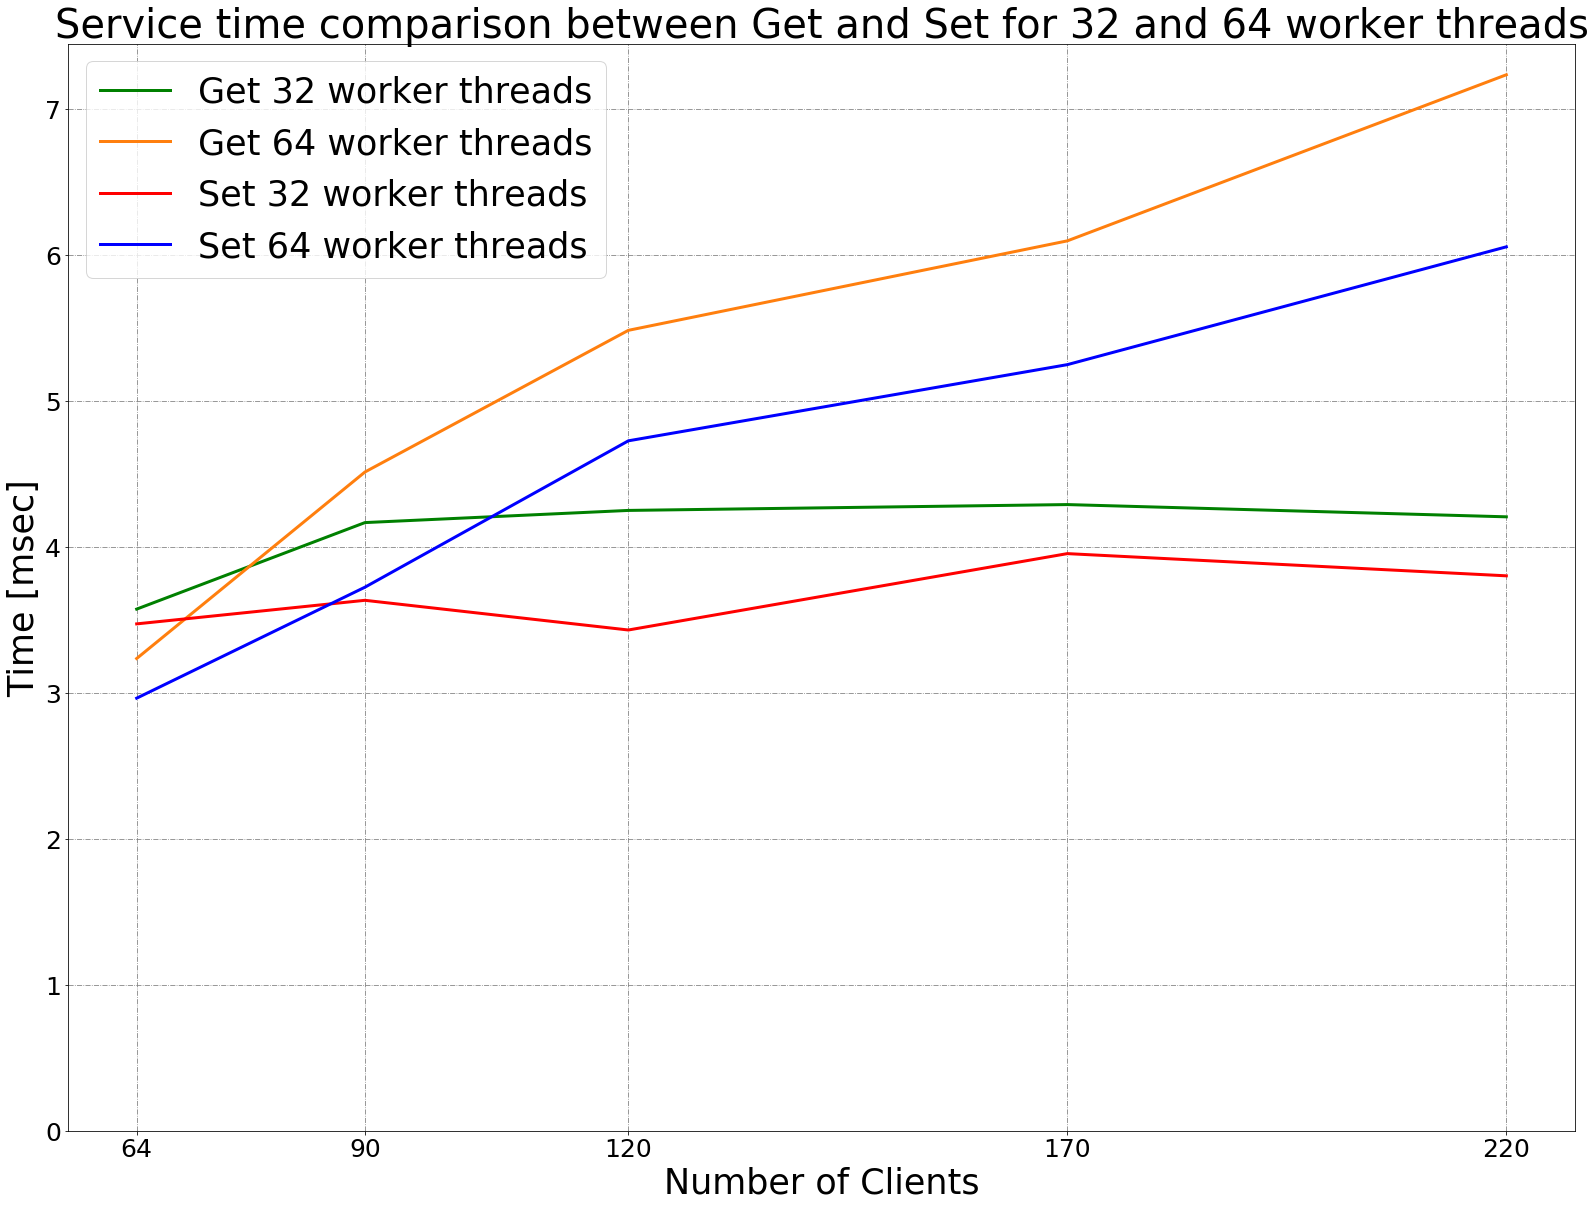

In [85]:
plt.show()

In [65]:
files = []
work = 0
allQueueLengths = [[[] for i in range(13)] for j in range(4)]
for worker in [8, 16, 32, 64]:
    clients = 0
    for cli in [1, 4, 8, 12, 16, 20, 24, 28, 32, 45, 60, 85, 110]:
        queueRep = np.zeros(3)
        for rep in range(1, 4):
            file = open(path+"rep"+str(rep)+"/MW/"+type+"_C"+str(cli)+"_T2_W"+str(worker)+"_R"+str(rep)+"/QueueLength.log")
            ind = 0
            lines = []
            for line in file:
                lines.append(line)
            j = 0
            while lines[j] == "0\n":
                j += 1
            j = j
            p = len(lines)-1
            while lines[p] == "0\n":
                p -= 1
            p = (len(lines)-p)
            if p == 0:
                p = 1
            x = np.asarray(lines[j:-p])
            x = x.astype(int)
            queueRep[rep-1] = np.mean(x)
        allQueueLengths[work][clients]= (np.mean(queueRep))

        clients += 1

    work += 1

In [66]:
fileOutput = open("/home/andrea/Desktop/Final/Baseline3Second/3.1/"+type+"/QueueLengths.txt", "w")

In [67]:
clients = [1, 4, 8, 12, 16, 20, 24, 28, 32, 45, 60, 85, 110]
for j in range(0, len(clients)):
    clients[j] = clients[j] *2

fileOutput.write("Mean Queue Length")
for j in range(len(allQueueLengths)):
    fileOutput.write("\n\nWorker: " + str(2**(3+j)) + "\n")
    for h in range(0, len(allQueueLengths[0])):         
        fileOutput.write("\n"+str(clients[h])+" Clients: ")
        fileOutput.write(str(allQueueLengths[j][h]))
fileOutput.close()

In [92]:
pendenze = np.zeros(4)
for j in range(0, len(allQueueLengths)):
    pendenze[j] = allQueueLengths[j][-1] - allQueueLengths[j][0]
print(pendenze)

[ 193.39177839  177.11144462  135.01484729   75.2334721 ]


In [7]:
import matplotlib.pyplot as plt 

In [42]:
plt.figure(figsize=(27, 20))
clients = [2, 8, 16, 24, 32, 40, 48, 56, 64, 90, 120, 170, 220]

plt.plot(clients, allQueueLengths[0], linewidth=3, markersize = 10, color="b", label = "8 worker threads")
plt.plot(clients, allQueueLengths[1], linewidth=3, markersize = 10, color="r", label = "16 worker threads")
plt.plot(clients, allQueueLengths[2], linewidth=3, markersize = 10, color="g", label = "32 worker threads")
plt.plot(clients, allQueueLengths[3], linewidth=3, markersize = 10, color="C1", label = "64 worker threads")
plt.legend(loc=2, fontsize=35)

plt.title('Queue Length', fontsize= 40)
plt.xlabel("Number of Clients", fontsize= 35)
plt.ylabel("Avg. number of jobs in the queue", fontsize= 35)
plt.grid(True)
plt.xticks(clients)
plt.rc('grid', linestyle="-.", color ='grey')
plt.xticks(fontsize = 30)
plt.yticks(fontsize = 30)
plt.grid(True)

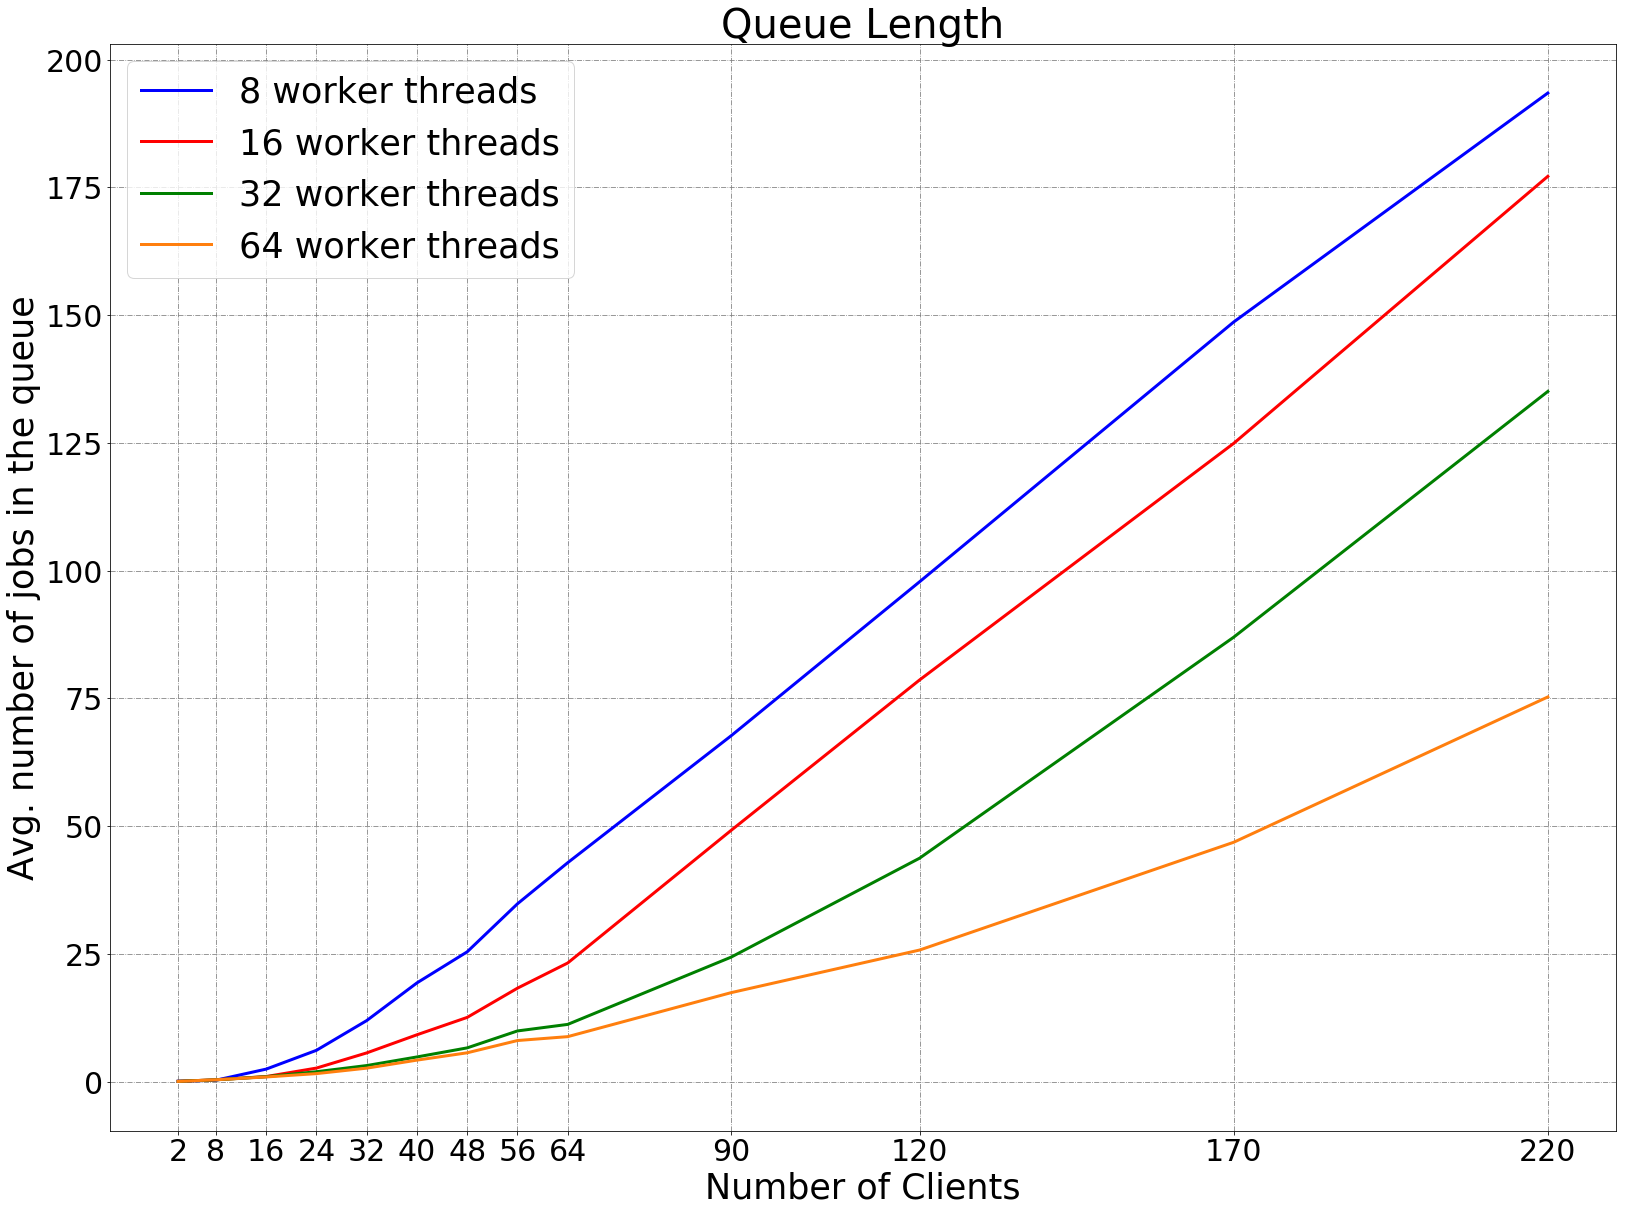

In [41]:
plt.show()

In [345]:
plt.figure(figsize=(27 20))
clients = [2, 8, 16, 24, 32, 40, 48, 56, 64, 90, 120, 170, 220]

plt.plot(clients, meanServ[0], linewidth=3, markersize = 10, color="b", label = "8 worker threads")
plt.plot(clients, meanServ[1], linewidth=3, markersize = 10, color="r", label = "16 worker threads")
plt.plot(clients, meanServ[2], linewidth=3, markersize = 10, color="g", label = "32 worker threads")
plt.plot(clients, meanServ[3], linewidth=3, markersize = 10, color="C1", label = "64 worker threads")
plt.legend(loc=2, fontsize=35)
plt.title('Processing Time (Time in Server)', fontsize= 40)
plt.xlabel("Number of Clients", fontsize= 35)
plt.ylabel("Avg. Time in Server [msec]", fontsize= 35)
plt.grid(True)
plt.xticks(clients)
plt.rc('grid', linestyle="-.", color ='grey')
plt.xticks(fontsize = 30)
plt.yticks(fontsize = 30)

(array([ 2500000.,  3000000.,  3500000.,  4000000.,  4500000.,  5000000.,
         5500000.,  6000000.,  6500000.]),
 <a list of 9 Text yticklabel objects>)

In [60]:
plt.figure(figsize=(27, 20))
clients = [2, 8, 16, 24, 32, 40, 48, 56, 64, 90, 120, 170, 220]

plt.plot(clients, meanServ[0]/1000000, linewidth=3, markersize = 10, color="r", label = "Service Time")
plt.plot(clients, meanWait[0]/1000000, linewidth=3, markersize = 10, color="g", label = "Waiting Time")
plt.plot(clients, meanResp[0]/1000000, linewidth=3, markersize = 10, color="b", label = "Response Time")
plt.legend(loc=2, fontsize=35)
plt.title('8 Worker Thread - Service, Waiting and Response Time over number of clients', fontsize= 35)
plt.xlabel("Number of Clients", fontsize= 35)
plt.ylabel("Time [msec]", fontsize= 35)
plt.grid(True)
plt.xticks(clients)
plt.rc('grid', linestyle="-.", color ='grey')
plt.xticks(fontsize = 30)
plt.yticks(fontsize = 30)

(array([ -20.,    0.,   20.,   40.,   60.,   80.,  100.]),
 <a list of 7 Text yticklabel objects>)

In [61]:
plt.savefig("/home/andrea/Desktop/Final/Baseline3Second/3.1/"+type+"/times8WorkerThreads.png")

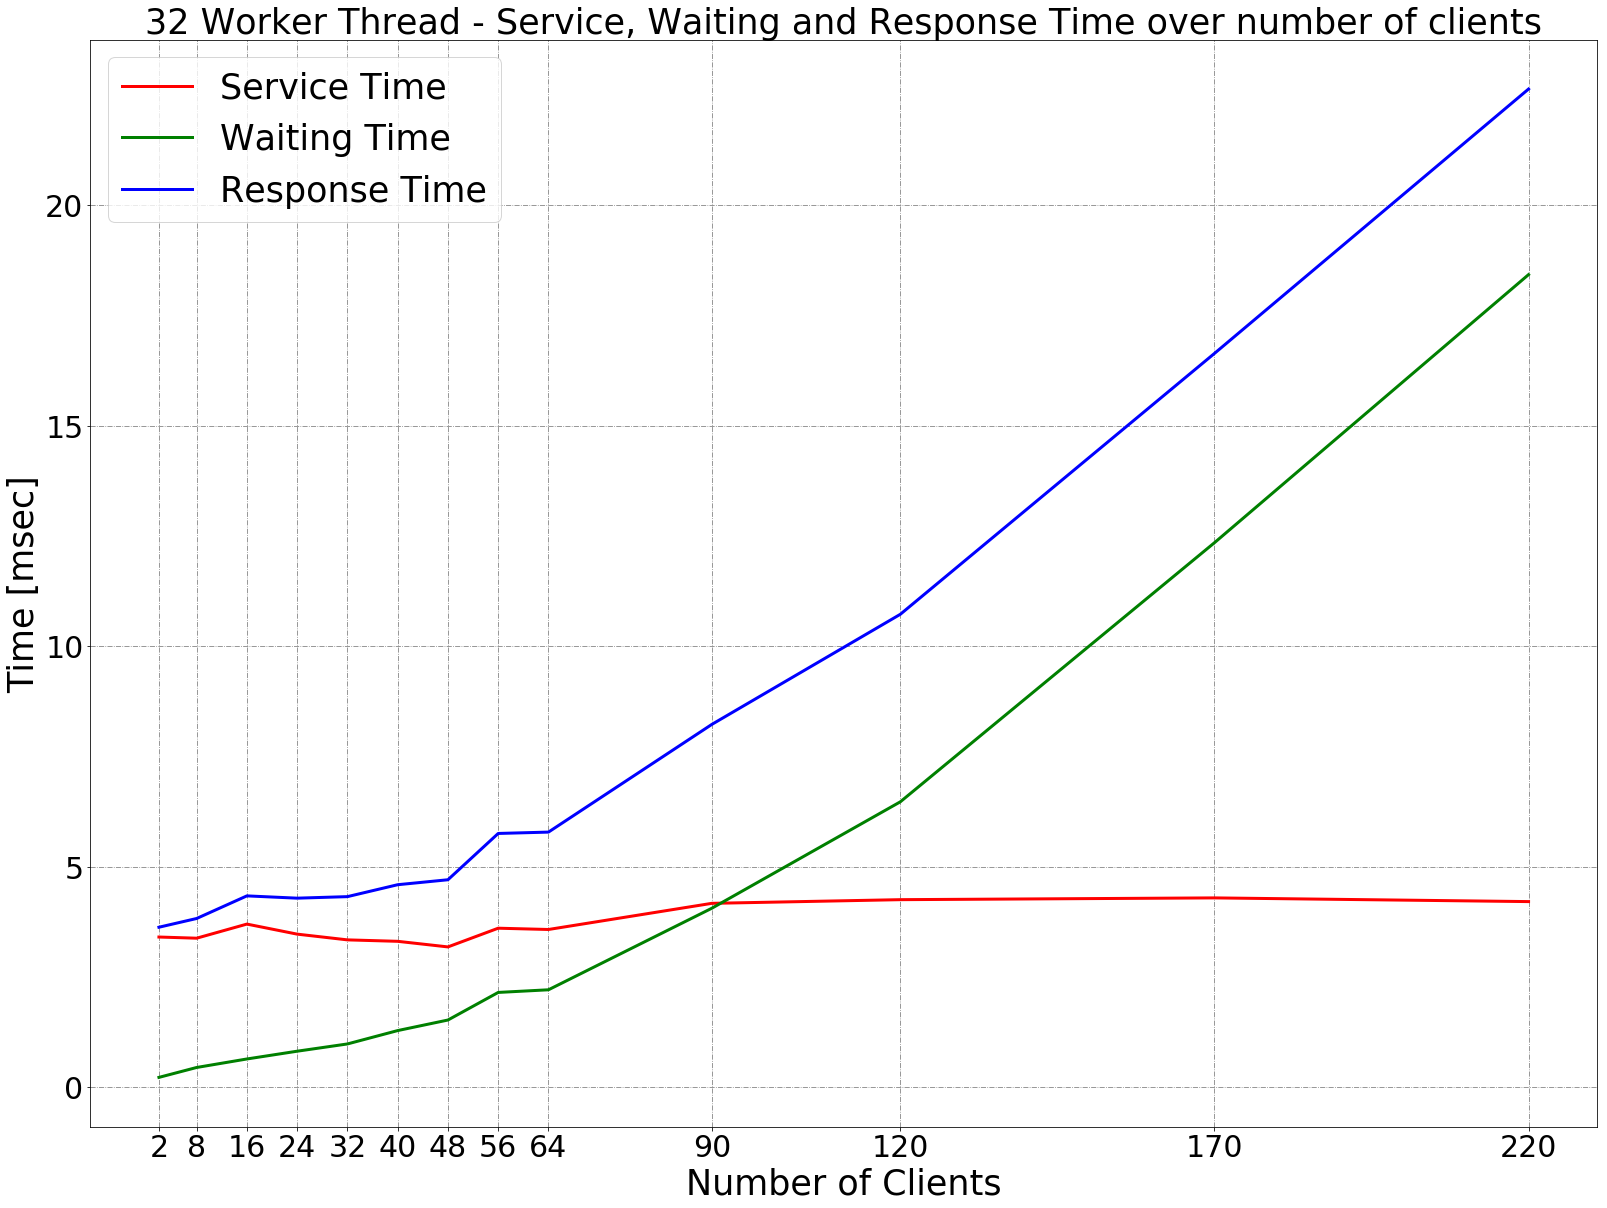

In [55]:
plt.show()